## Импорт датасета и предобработка.

In [66]:
import json
import numpy as np
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from matplotlib import pyplot as plt

In [67]:
with open("reviews_data.json", "r") as read_file:
    load_data = json.load(read_file)

In [68]:
reviews = []
reviews += load_data['good']
reviews += load_data['bad']
reviews += load_data['neutral']
len(reviews)

3000

In [69]:
labels = [1 for _ in range(1000)] + [-1 for _ in range(1000)] + [0 for _ in range(1000)]
len(labels)

3000

In [70]:
max_len = 500
training_samples = 2400
max_words = 10000

In [71]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

In [72]:
sequences = tokenizer.texts_to_sequences(reviews)
len(sequences)

3000

In [73]:
word_index = tokenizer.word_index

In [74]:
data = pad_sequences(sequences, maxlen=max_len)
len(data)

3000

In [75]:
labels = np.asarray(labels)

In [76]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

labels = to_one_hot(labels)
labels.shape

(3000, 3)

In [77]:
indices = np.arange(3000)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [78]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_test = data[training_samples:]
y_test = labels[training_samples:]

## Исключение нейтральных отзывов.

In [79]:
binary_data = reviews[:2000]
binary_labels = [0 for _ in range(1000)] + [1 for _ in range(1000)]

In [80]:
max_len = 500
training_samples = 1500
max_words = 10000
binary_tokenizer = Tokenizer(num_words=max_words)
binary_tokenizer.fit_on_texts(binary_data)
binary_sequences = binary_tokenizer.texts_to_sequences(binary_data)
binary_word_index = binary_tokenizer.word_index
binary_data = pad_sequences(binary_sequences, maxlen=max_len)
binary_labels = np.asarray(binary_labels)
indices = np.arange(2000)
np.random.shuffle(indices)
binary_data = binary_data[indices]
binary_labels = binary_labels[indices]
binary_X_train = binary_data[:training_samples]
binary_y_train = binary_labels[:training_samples]
binary_X_test = binary_data[training_samples:]
binary_y_test = binary_labels[training_samples:]

In [81]:
binary_model = Sequential()
binary_model.add(Embedding(max_words, 32))
binary_model.add(LSTM(32))
binary_model.add(Dense(1, activation='sigmoid'))
binary_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])
binary_model_history = binary_model.fit(binary_X_train, binary_y_train,
                                        epochs=15,
                                        batch_size=128,
                                        validation_split=0.2)

Epoch 1/15
10/10 [==============================] - 3s 193ms/step - loss: 0.6917 - acc: 0.5150 - val_loss: 0.6886 - val_acc: 0.5800
Epoch 2/15
10/10 [==============================] - 1s 140ms/step - loss: 0.6860 - acc: 0.6875 - val_loss: 0.6810 - val_acc: 0.6733
Epoch 3/15
10/10 [==============================] - 1s 141ms/step - loss: 0.6717 - acc: 0.7842 - val_loss: 0.6532 - val_acc: 0.7867
Epoch 4/15
10/10 [==============================] - 1s 144ms/step - loss: 0.6095 - acc: 0.7500 - val_loss: 0.5414 - val_acc: 0.8200
Epoch 5/15
10/10 [==============================] - 1s 148ms/step - loss: 0.4969 - acc: 0.8058 - val_loss: 0.4294 - val_acc: 0.8733
Epoch 6/15
10/10 [==============================] - 1s 139ms/step - loss: 0.4287 - acc: 0.8508 - val_loss: 0.4653 - val_acc: 0.7733
Epoch 7/15
10/10 [==============================] - 1s 141ms/step - loss: 0.3486 - acc: 0.9092 - val_loss: 0.5110 - val_acc: 0.7067
Epoch 8/15
10/10 [==============================] - 1s 144ms/step - loss: 0.

In [82]:
def plotting(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', color='blue', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='orange', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'b', color='blue', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

C:\Users\kozyr\AppData\Local\Temp\ipykernel_8016\2124928173.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', color='blue', label='Training acc')
C:\Users\kozyr\AppData\Local\Temp\ipykernel_8016\2124928173.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='orange', label='Validation acc')
C:\Users\kozyr\AppData\Local\Temp\ipykernel_8016\2124928173.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', color='blue', label='Training loss')
C:\Users\kozyr\AppData\Local\Temp\ipykernel_8016\2124928173.py:15: UserWarning: col

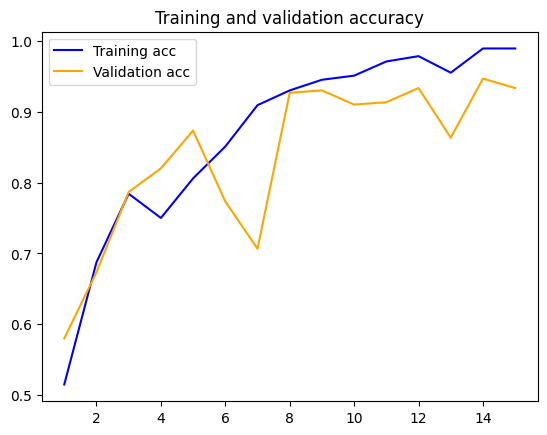

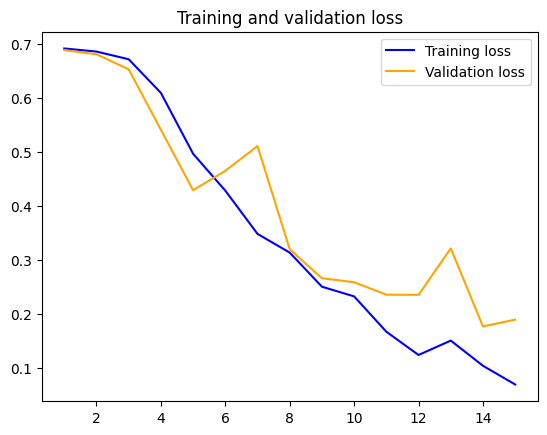

In [83]:
plotting(binary_model_history)

In [84]:
binary_model.evaluate(binary_X_test, binary_y_test)

16/16 [==============================] - 0s 23ms/step - loss: 0.2006 - acc: 0.9280


[0.20059265196323395, 0.9279999732971191]